# Gradient Descent🗻🗻

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/mountain.jpg" />



## What you will learn in this course ? 🧐🧐

Gradient descent is a simple algorithm that makes it possible to optimize functions so as to find their minimum, it is central to the field of deep learning. It is commonly compared to climbing down a mountain, we will see why when digging deep into how it works.

In this lecture we will go over the following subjects :
1. Reminder: What are models
2. What is a cost/loss function
3. What is a gradient
4. Gradient descent for function with 1 minimum
5. Gradient descent for a function with more than one minimum
6. What is the learning rate ?
7. What is stochastic gradient descent ?
8. What is batch gradient descent ?

## 1. Reminder: What are models? 📈📈

Models are the mathematical objects that help us turn our observations into predictions, let's go back to the basics of what models are.

Let $X$ be a ensemble of observations that are described by some variables and $Y$ be the target variable.

In supervised machine learning we make the hypothesis that a function $f$ exists such that:

$$
f(X)=Y + \epsilon
$$

Where $\epsilon$ is some noise that may disturb the value of $Y$, it can be caused by measurement errors (e.g. when $X$ is the temperature setting of a radiator, the actual temperature of the radiator that we measure with a thermometer may not be perfectly precise, causing some noise in $Y$'s measurement).

There is no way to observe $f$, thus data scientists need to make an hypothesis on what $f$ is like. This hypothesis can be noted $h$ and verifies the following equation:

$$
h(X)=Y + \epsilon
$$

Where $\epsilon$ the prediction error, and $h$ is... you guessed it : the **model**! $\epsilon$ the prediction error has the same notation as the noise because the prediction error as we have seen before when learning about supervised learning comprises three components : the model's bias, the model's variance, and the noise.

We have seen many models before, for example we can think of the linear regression:

In [2]:
color_chart = ["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]

In [4]:
# Let's generate some data for the example
import numpy as np
import pandas as pd
import seaborn as sns

# X is taken from random realizations of a normal distribution
X = np.random.randn(100)

# Let's say the true relation between X and Y is defined by the function f(x) = 3x + 2
Y = X*3 + 2

# Let's now add some noise to the measure of Y, taken from a normal distribution
noise = np.random.randn(100)
Y += noise



In [24]:
import plotly.graph_objects as go

# This is what our data looks like
fig = go.Figure()
fig.add_trace(go.Scatter(x=X,y=Y,
              marker=dict(color=color_chart[0], size=10),
              mode="markers",
              name = "data"))
fig.update_layout(
    title="Example Data",
    xaxis_title="X",
    yaxis_title="Y"
    )
fig.data[0].marker.line.width = 1
fig.data[0].marker.line.color = color_chart[-1]
fig.update_layout(font=dict(size=20))
fig.show()

In [25]:
import plotly.express as px
fig = px.scatter(x=X, y=Y)
fig.show()


A linear regression seems like a good candidate to model the relationship between $X$ and $Y$, let's try and fit a linear regression model on the data and see what happens!

In [26]:
from sklearn.linear_model import LinearRegression


linreg = LinearRegression()                 # Instanciate the model a.k.a. the hypothesis h
linreg.fit(X.reshape(-1,1),Y)               # Fit the model

preds = linreg.predict(X.reshape(-1,1))     # Let's make predictions



In [27]:
# Let's visualize the model against the data
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=X,y=Y,
              marker=dict(color=color_chart[0], size=10),
              mode="markers",
              name = "data"))
fig.add_trace(go.Scatter(x=X, y=preds,
              marker=dict(color=color_chart[1]),
              mode="lines",
              name="model"))
fig.update_traces(
    line=dict(width=5))
fig.update_layout(
    title="Target vs Predictions",
    xaxis_title="X",
    yaxis_title="Y"
    )
fig.data[0].marker.line.width = 1
fig.data[0].marker.line.color = color_chart[-1]
fig.update_layout(font=dict(size=20))
# fig.show("svg")
fig.show()

In [28]:
fig = px.scatter(x=X, y=Y)
fig.add_scatter(x=X, y=preds)
fig.show()


The linear regression model was indeed a very good candidate to model this problem. But how was it able to fit the data ? It must have known that the best model was the one that could make predictions that were closest to the datapoints! Which leads us to talking about **loss functions**.

## 2. Cost/Loss Functions 💰💰

A loss function (or Cost function depending on the sources) is a function that we define in order to measure how bad the model's predictions errors are. In the case of the linear regression the loss fucntion is the well-known mean squared error : MSE!

$$
\frac{1}{n}\sum_{i=1}^{n}{(Y-h(X))^{2}}
$$

Where $n$ is the number of observations in our dataset.

More generally the loss function is the objective function that the model will have to minimize by adapting the values of its parameters!

In our case of linear regression define by $h(X) = \beta_0 + \beta_1 X$ there are two parameters : $\beta_0$, the intercept and $\beta_1$ the coefficient associated with the variable $X$.

The loss function defines the objective that the model has to minimize, therefore it needs to be well aligned with the general goal of our model. In the following lectures we will discover several loss functions that are useful for different kinds of problems : binary classification, multi-class classification, multi-label classification (when an observation can belong to several classes at once), or even image or text generation.

Now we know what a loss function is and that we can minimize it by changing the values of the model's parameters, but we do not yet know how we should change them ? This is where gradient descent comes in ! 👼

In [30]:
# import plotly.graph_objects as go

def func_3D(x,y):
  a = 20*np.exp(- (x - 3)**2/10 - (y -2)**2/20) 
  b = - 16*np.exp(- (x +1)**2/15 - (y +6)**2/20) 
  c = - 5*np.exp(- (x +6)**2/25 - (y - 7)**2/13)
  return a + b + c


x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)
xx1, xx2 = np.meshgrid(x1,x2, indexing='ij')

y = func_3D(xx1,xx2)
y_gradient = np.gradient(y,x1,x2)



In [31]:
fig = go.Figure(data=[go.Surface(
    contours = {
        "z": {"show": True, "start": -16, "end": 20, "size": 2, "color":"black"}
    },
    x = x1,
    y = x2,
    z = y,
    colorscale=[color_chart[3], color_chart[-2]], 
    opacity = 0.7)
  ]
)

fig.update_layout(
        scene = {
            "xaxis": {"nticks": 20},
            "yaxis": {"nticks": 20},
            "zaxis": {"nticks": 4},
            'camera_eye': {"x": 0, "y": -1, "z": 1},
            "aspectratio": {"x": 1, "y": 1, "z": 1},
        })

# fig.show("svg")
fig.show()

## 3. Gradient 📉📉

Before diving into the details of gradient descent, let's first talk about gradients! Gradients are the generalization of derivatives for multi-parameter functions. There is a lot to know about gradients if you wish learn the full exent of the known secrets of calculus, thankfully the functions we will use in deep learning have very friendly properties and we will be able to easily define the gradient of a function $C$ as follows:

$$
\nabla C = (\frac{\partial C}{\partial \beta_0}, \frac{\partial C}{\partial \beta_1},\dots, \frac{\partial C}{\partial \beta_p})
$$

$\nabla$ is the gradient symbol, $\nabla C$ reads "gradient of C" is equal to a vector which components are the partial derivative of function $C$ with regards to $\beta_0,\beta_1, \dots, \beta_p$ respectivally.

Visually speaking, like the derivative can be interpreted as the slope of the tangent to the graph of a function at a given point, the gradient is the vector of direction and rate of highest increase of a function (imagine you are on a mountain and you are climbing, the gradient is defined by the direction towards where the climb is steepest and the steepness of the slope 🌄)

The figure below shows the gradient of a two dimensional function $z = f(x,y)$ at a given point of the graph to help you see the analogy with the derivative of a one-dimensional function.

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/gradient.jpg" />

But the analogy does not stop here, like the derivative of a function equals zero wherever a function attains a minimum or maximum, all the components of the gradient equal zero where a multi-dimensional function reaches a minimum or maximum:

$$
\nabla_{\beta_{optimal}} C = (0, \dots, 0)
$$

Additionally, the gradient points toward the direction of highest increase, which means it points toward the opposite direction of highest decrease!

These properties are exactly what will make the gradient descent algorithm work!

In [46]:
# import plotly.graph_objects as go

def func_3D(x,y):
  a = 20*np.exp(- (x - 3)**2/10 - (y -2)**2/20) 
  b = - 16*np.exp(- (x +1)**2/15 - (y +6)**2/20) 
  c = - 5*np.exp(- (x +6)**2/25 - (y - 7)**2/13)
  return a + b + c


x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)
xx1, xx2 = np.meshgrid(x1,x2, indexing='xy')

y = func_3D(xx1,xx2)
y_gradient = np.gradient(y,x1,x2)



In [47]:
fig = go.Figure(data=[go.Surface(
    contours = {
        "z": {"show": True, "start": -16, "end": 20, "size": 2, "color":"black"}
    },
    x = x1,
    y = x2,
    z = y,
    colorscale=[color_chart[3], color_chart[-2]], 
    opacity = 0.7),
    go.Cone(
        x=[xx1[50,60] + y_gradient[0][50,60]],
        y=[xx2[50,60] + y_gradient[1][50,60]],
        z=[y[50,60] + y_gradient[0][50,60]**2 + y_gradient[1][50,60]**2 + xx2[50,60]],
        u=[y_gradient[0][50,60]],
        v=[y_gradient[1][50,60]],
        w=[y_gradient[0][50,60]**2 + y_gradient[1][50,60]**2 + xx2[50,60]],
        sizemode="absolute",
        sizeref=2,
        anchor='tail',
        colorscale=["black","black"],
        showscale=False),

        go.Scatter3d(
        x=[xx1[50,60], xx1[50,60] + y_gradient[0][50,60]],
        y=[xx2[50,60], xx2[50,60] + y_gradient[1][50,60]],
        z=[y[50,60], y[50,60] + y_gradient[0][50,60]**2 + y_gradient[1][50,60]**2 + xx2[50,60]],
        mode='lines',
        line=dict(
            color='black',
            width=2
        ))])
fig.update_layout(
        scene = {
            "xaxis": {"nticks": 20},
            "yaxis": {"nticks": 20},
            "zaxis": {"nticks": 4},
            'camera_eye': {"x": 0, "y": -1, "z": 1},
            "aspectratio": {"x": 1, "y": 1, "z": 1},
            "annotations":[dict(x=xx1[50,60] + y_gradient[0][50,60],
                                y=xx2[50,60] + y_gradient[1][50,60],
                                z=y[50,60] + y_gradient[0][50,60]**2 + y_gradient[1][50,60]**2 + xx2[50,60] + 1,
                               text="Gradient",
                               textangle=0,
                               ax=-20,
                               ay=-20,
                               font=dict(
                                   color="black",
                                   size=18
                                   ),
                               arrowcolor="black",
                               arrowsize=1,
                               arrowwidth=1,
                               arrowhead=1)]
        })
# fig.show("svg")
fig.show()

## 4. Gradient Descent algorithm ⚙️⚙️

The goal of the gradient descent algorithm is to find a set of parameters for the model $h$ that will make the loss function as small as possible, it wants to minimize the loss function by finding the best parameters.

You may be wondering why do we need such an algorithm when we could just run a grid search and explore wide ranges of possible values for the parameters and select those that yield the smallest value for the loss function? Well, first, that would not be very smart to use brute force in order to minimize the loss function. Additionally it would be computanionally impossible, let's not forget that data science is at the cross-road of statistics and computer science, we are working with computers to make our calculations for us, and they have limited capabilities. As we will see in the following lectures, deep learning models sometimes have several million parameters, it would be impossible to optimize them through a simple grid search within a lifetime! 👴

Therefore we need a clever method to optimize the model's parameters as efficiently as possibe, which is where gradient descent comes in!

As for most algorithms, gradient descent is composed of three essential steps: 

* Initialization
* Interation
* Stopping condition

### Initialization

This is the step where we have to assign an initial value to each of the model's parameters, the most common strategy is to assign random values to every parameter taken from a zero-mean distribution.

We will see in further lectures some tactics to initialize model parameters in order to kickstart the prediction performance.

We can denote the initial values of the parameters like so:

$$
\beta^{(0)} = (\beta_0^{(0)}, \dots, \beta_p^{(0)})
$$

That reads "beta a step zero".

### Iteration
The iteration step is the moment that the algorithm repeats an action until
 the stopping condition is verified. Here the iteration step will modify the value of the model parameters iteratively so as to decrease the value of the loss function $C$.

It will do so by using the following formula:

$$
\beta^{(t+1)}=\beta^{(t)} - \gamma \times \nabla_{\beta^{(t)}} C(Y,h(X))
$$

The value of $\beta$ at step $t+1$ will be equal to the value of $\beta$ at step $t$ minus the gradient of the loss function at point $\beta^{(t)}$ times the learning rate noted $\gamma$.

The figure below shows what happens during one step of gradient descent :

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/gradient_descent_step.jpg" />

You can see that the opposite of the gradient points towards the direction that most decreases the loss function, the goal of the learning rate is to determine how fast we wish to move the values of the parameters in this direction.

### Stopping criterion

Most algorithm have a stopping criterion based on a certain appreciation of the convergence of the algorithm, meaning what happens in one step does not create much change compared to what happened in the previous step.

In deep learning, as we will soon discover, the stopping criterion is harder to attain in pratice, fitting such models may take a long time and as they are very complicated models, they tend to overfit easily, which means we don't necessarily wish to let them fit the training data until convergence, but rather stop them before they start to overfit too much.

The most common stopping criterion in deep learning will thefore be a limit on the number of gradient descent steps we wish to take.

Let's see how gradient descent works in practise:

In [33]:
# import plotly.graph_objects as go

def func_3D(x,y):
  a = 20*np.exp(- (x - 3)**2/10 - (y -2)**2/20) 
  b = - 16*np.exp(- (x +1)**2/15 - (y +6)**2/20) 
  c = - 5*np.exp(- (x +6)**2/25 - (y - 7)**2/13)
  return a + b + c

x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)
xx1, xx2 = np.meshgrid(x1,x2, indexing='xy')
y = func_3D(xx1,xx2)
y_gradient = np.gradient(y,x1,x2)


In [34]:
fig = go.Figure(data=[go.Surface(
    contours = {
        "z": {"show": True, "start": -16, "end": 20, "size": 2, "color":"black"}
    },
    x = x1,
    y = x2,
    z = y,
    colorscale=[color_chart[3], color_chart[-2]], 
    opacity = 0.5),
    go.Cone(
        x=[xx1[50,60] + y_gradient[0][50,60]],
        y=[xx2[50,60] + y_gradient[1][50,60]],
        z=[y[50,60] + y_gradient[0][50,60]**2 + y_gradient[1][50,60]**2 + xx2[50,60]],
        u=[y_gradient[0][50,60]],
        v=[y_gradient[1][50,60]],
        w=[y_gradient[0][50,60]**2 + y_gradient[1][50,60]**2 + xx2[50,60]],
        sizemode="absolute",
        sizeref=2,
        anchor='tail',
        colorscale=["black","black"],
        showscale=False),

        go.Scatter3d(
        x=[xx1[50,60], xx1[50,60] + y_gradient[0][50,60]],
        y=[xx2[50,60], xx2[50,60] + y_gradient[1][50,60]],
        z=[y[50,60], y[50,60] + y_gradient[0][50,60]**2 + y_gradient[1][50,60]**2 + xx2[50,60]],
        mode='lines',
        showlegend=False,
        line=dict(
            color='black',
            width=2,
            showscale=False
        )),
        go.Cone(
        x=[xx1[50,60] - 0.5*y_gradient[0][50,60]],
        y=[xx2[50,60] - 0.5*y_gradient[1][50,60]],
        z=[y[50,60] - 0.5*(y_gradient[0][50,60]**2 + y_gradient[1][50,60]**2 + xx2[50,60])],
        u=[-0.5*y_gradient[0][50,60]],
        v=[-0.5*y_gradient[1][50,60]],
        w=[-0.5*(y_gradient[0][50,60]**2 + y_gradient[1][50,60]**2 + xx2[50,60])],
        sizemode="absolute",
        sizeref=2,
        anchor='tail',
        colorscale=["black","black"],
        showscale=False),

        go.Scatter3d(
        x=[xx1[50,60], xx1[50,60] -0.5*y_gradient[0][50,60]],
        y=[xx2[50,60], xx2[50,60] -0.5*y_gradient[1][50,60]],
        z=[y[50,60], y[50,60] -0.5*(y_gradient[0][50,60]**2 + y_gradient[1][50,60]**2 + xx2[50,60])],
        mode='lines',
        showlegend=False,
        line=dict(
            color='black',
            width=2,
            showscale=False
        )),
        go.Scatter3d(
        x=[xx1[50,60] -0.5*y_gradient[0][50,60], xx1[50,60] -0.5*y_gradient[0][50,60]],
        y=[xx2[50,60] -0.5*y_gradient[1][50,60], xx2[50,60] -0.5*y_gradient[1][50,60]],
        z=[y[50,60] -0.5*(y_gradient[0][50,60]**2 + y_gradient[1][50,60]**2 + xx2[50,60]),
           func_3D(xx1[50,60] -0.5*y_gradient[0][50,60], xx2[50,60] -0.5*y_gradient[1][50,60])],
        mode='lines',
        showlegend=False,
        line=dict(
            color='black',
            width=2,
            showscale=False
            )
        )
      ]
    )
fig.update_layout(
        scene = {
            "xaxis": {"nticks": 20},
            "yaxis": {"nticks": 20},
            "zaxis": {"nticks": 4},
            'camera_eye': {"x": 0, "y": -1, "z": 1},
            "aspectratio": {"x": 1, "y": 1, "z": 1},
            "annotations":[dict(x=xx1[50,60] + y_gradient[0][50,60],
                                y=xx2[50,60] + y_gradient[1][50,60],
                                z=y[50,60] + y_gradient[0][50,60]**2 + y_gradient[1][50,60]**2 + xx2[50,60] + 1,
                               text="Gradient",
                               textangle=0,
                               ax=-20,
                               ay=-20,
                               font=dict(
                                   color="black",
                                   size=18
                                   ),
                               arrowcolor="black",
                               arrowsize=1,
                               arrowwidth=1,
                               arrowhead=1),
                           dict(x=xx1[50,60],
                                y=xx2[50,60],
                                z=y[50,60],
                               text="Beta (t)",
                               textangle=0,
                               ax=-20,
                               ay=-20,
                               font=dict(
                                   color="black",
                                   size=18
                                   ),
                               arrowcolor="black",
                               arrowsize=1,
                               arrowwidth=1,
                               arrowhead=1),
                           dict(x=xx1[50,60] -0.5*y_gradient[0][50,60],
                                y=xx2[50,60] -0.5*y_gradient[1][50,60],
                                z=func_3D(xx1[50,60] -0.5*y_gradient[0][50,60], xx2[50,60] -0.5*y_gradient[1][50,60]),
                               text="Beta (t+1)",
                               textangle=0,
                               ax=20,
                               ay=20,
                               font=dict(
                                   color="black",
                                   size=18
                                   ),
                               arrowcolor="black",
                               arrowsize=1,
                               arrowwidth=1,
                               arrowhead=1),
                           dict(x=xx1[50,60] -0.5*y_gradient[0][50,60],
                                y=xx2[50,60] -0.5*y_gradient[1][50,60],
                                z=y[50,60] -0.5*(y_gradient[0][50,60]**2 + y_gradient[1][50,60]**2 + xx2[50,60]),
                               text="- lr Gradient",
                               textangle=0,
                               ax= -20,
                               ay= -20,
                               font=dict(
                                   color="black",
                                   size=18
                                   ),
                               arrowcolor="black",
                               arrowsize=1,
                               arrowwidth=1,
                               arrowhead=1)
                           ]
        })
# fig.show("svg")
fig.show()

## 5. Gradient descent for a function with one minimum 👌👌

We will show here how gradient descent works for a function with a single minimum, which guarantees that the algorithm will be able to find the minimum :

In [35]:
# from plotly import express as px

# Now we define a function with a single minimum
def func(beta):
  return beta**2 - 6*beta + 14



# Let us generate some input data :
beta = np.linspace(-10, 16, 1000)
y = func(beta)

# Let's plot this function
# px.line(x=beta,y=y, color_discrete_sequence=color_chart, render_mode="svg")
px.line(x=beta, y=y, color_discrete_sequence=color_chart)

This function admits a single minimum, let's now pick a starting value for the parameter $\beta$ and try to use the gradient descent algorithm :

In [36]:
# let's define a function to plot the gradient descent :
def plot_gradient_descent(beta, beta_list, func, gradient):
    # Let's visualise the different values of beta_optimum and the resulting value of the function
    import matplotlib.pyplot as plt

    # The plot: LHS is the data, RHS will be the loss function.
    fig, ax = plt.subplots(figsize=(15,10))

    # The loss function as a function of its single parameter, theta1.
    ax.plot(beta, y, 'k')

    # Annotate the loss function plot with coloured points indicating the
    # parameters chosen and red arrows indicating the steps down the gradient.
    for j in range(1,len(beta_list)):
        ax.annotate('', xy=(beta_list[j], func(beta_list[j])), xytext=(beta_list[j-1], func(beta_list[j-1])),
                    arrowprops={'arrowstyle': '->', 'color': color_chart[-1], 'lw': 1},
                    va='center', ha='center')

    y_min, y_max = ax.get_ylim()

    for j in range(1,len(beta_list)):
        ax.annotate('', xy=(beta_list[j], y_min), xytext=(beta_list[j-1], y_min),
                        arrowprops={'arrowstyle': '->', 'color': color_chart[-1], 'lw': 1},
                        va='center', ha='center')

    for j in range(len(beta_list)):
        ax.annotate('beta{}'.format(j), xy=(beta_list[j], func(beta_list[j])), xytext=(beta_list[j], y_min - 0.05*(y_max - y_min)),
                    arrowprops={'arrowstyle': '-', 'color': color_chart[-1], 'lw': 1},
                    va='center', ha='center')


    # Labels, titles and a legend.
    ax.scatter(beta_list, func(np.array(beta_list)), c=color_chart[-2], s=40, lw=0)
    #ax.scatter(beta_list, np.zeros_like(beta_list)+y_min, c="red", s=40, lw=0)

    ax.set_xlabel(r'$\beta$')
    ax.set_ylabel(r'$C$')
    ax.set_title('Loss function')

    plt.show()

    print("The final value of beta is : {}".format(beta_optimum))

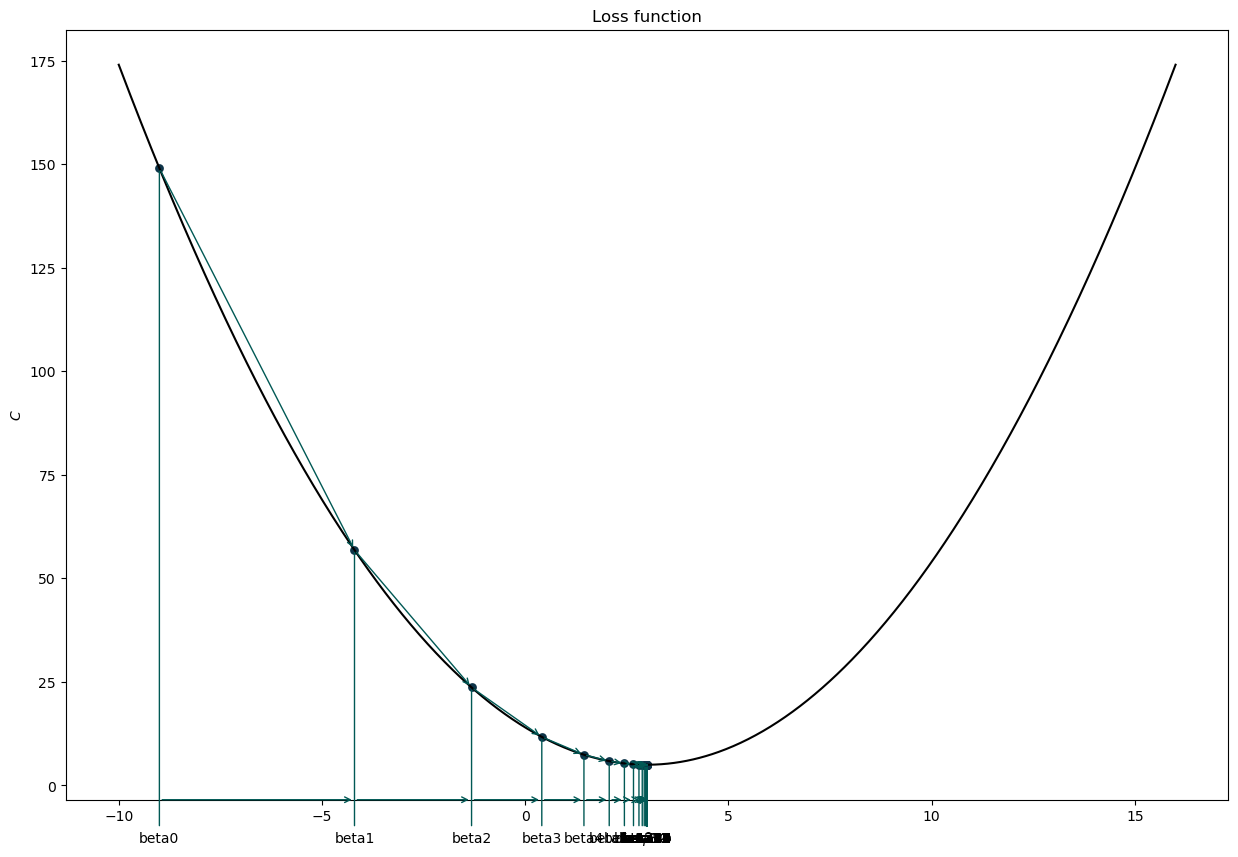

The final value of beta is : 2.9999999999418034


In [37]:
# The gradient of this function is the derivative of the function relatively to beta
def gradient(beta):
    return 2*beta - 6

# Initialization step
beta_optimum = -9.0

# Let's do 10 gradient descent steps
stop = 50

# We define the learning rate equals to 0.1
lr = 0.2

# Iteration
i=0
beta_list = [beta_optimum]
while i <= stop:
    beta_optimum -= lr * gradient(beta_optimum)
    beta_list.append(beta_optimum) # we make a list with all successive values of beta_optimum
    i += 1

plot_gradient_descent(beta, beta_list, func, gradient)

The gradient descent has been able to approximate the optimal value for beta rather quickly! Not bad right! 

You can run this code again and change the starting value of beta, you should always end up with a good approximation of the optimal beta.

Though in practice things are not always that easy, let's see a different example.

## 6. Gradient Descent for a function with several minima 😵😵

When the loss function admits several minima instead of one, which happens all the time in practice, things are a little bit more complicated, let's see why with an example :

In [38]:
# Let us generate some input data :
beta = np.linspace(-11, 12, 1000)

# Now we define a function with a single minimum
def func(beta):
    return (beta + 9) * (beta + 2) * (beta - 6) * (beta - 9) / 1000
y = func(beta)

# Let's plot this function
px.line(x=beta,y=y, color_discrete_sequence=color_chart)

Here we see clearly that this loss function admits two minima, one around $beta=8$ and one around $beta=-7$, although only the latter is the actual minimum of the function, the other one is only a local minimum.

Let's see what happens to our gradient descent when picking a starting value of $12$ for $\beta$.

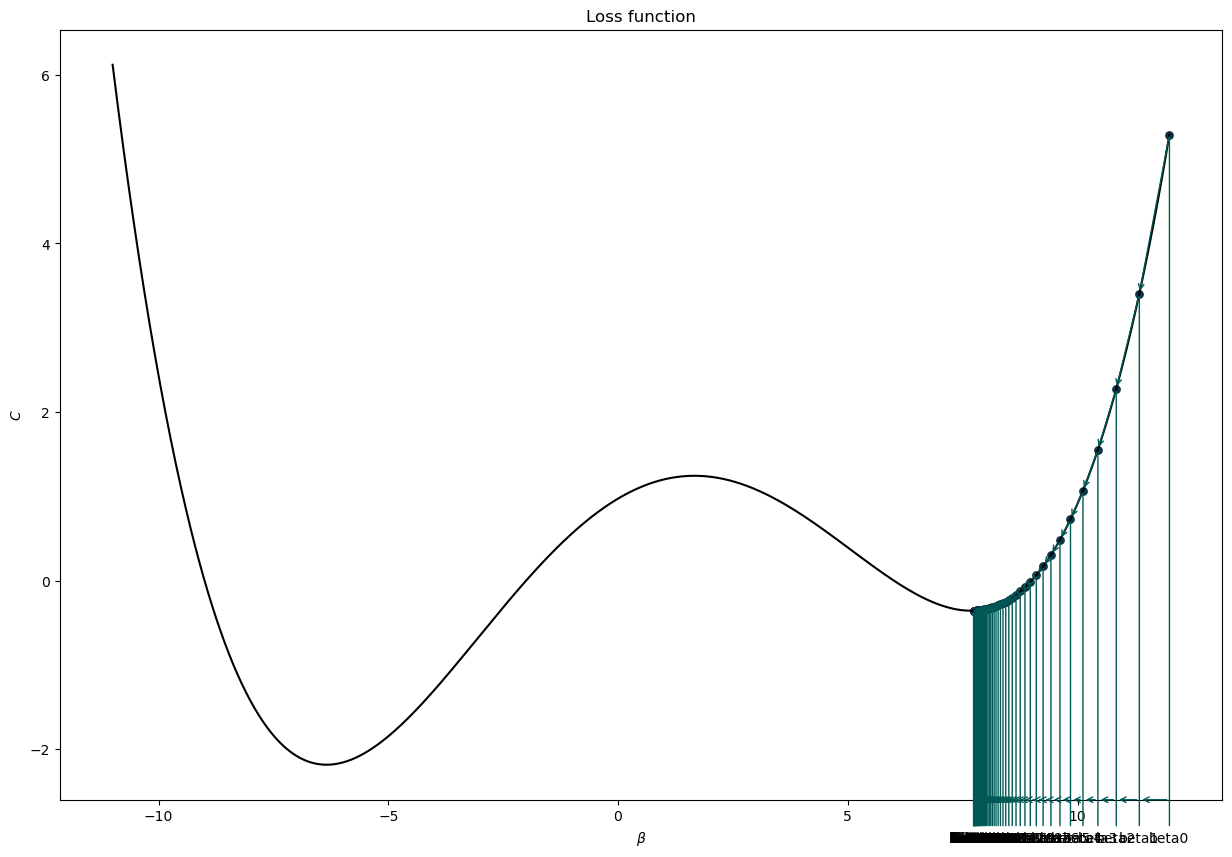

The final value of beta is : 7.736441382616915


In [11]:
# The gradient of this function is the derivative of the function relatively to beta
def gradient(beta):
    return ((beta + 2) * (beta - 6) * (beta - 9) + (beta + 9) * ((beta - 6) * (beta - 9) + (beta + 2) * ((beta - 9) + (beta - 6))))/1000

# Initialization step
beta_optimum = 12

# Let's do 10 gradient descent steps
stop = 50

# We define the learning rate equals to 0.1
lr = 0.2

# Iteration
i=0
beta_list = [beta_optimum]
while i <= stop:
    beta_optimum -= lr * gradient(beta_optimum)
    beta_list.append(beta_optimum) # we make a list with all successive values of beta_optimum
    i += 1

plot_gradient_descent(beta, beta_list, func, gradient)

The gradient descent lets us fall right into the trap of the local minimum, and no matter how many iterations you go through $\beta$ will not leave this place because locally, this value of $\beta$ corresponds to a minimum of the function.

What happens if we pick and new starting value for $\beta$, like $-12$ for example ?

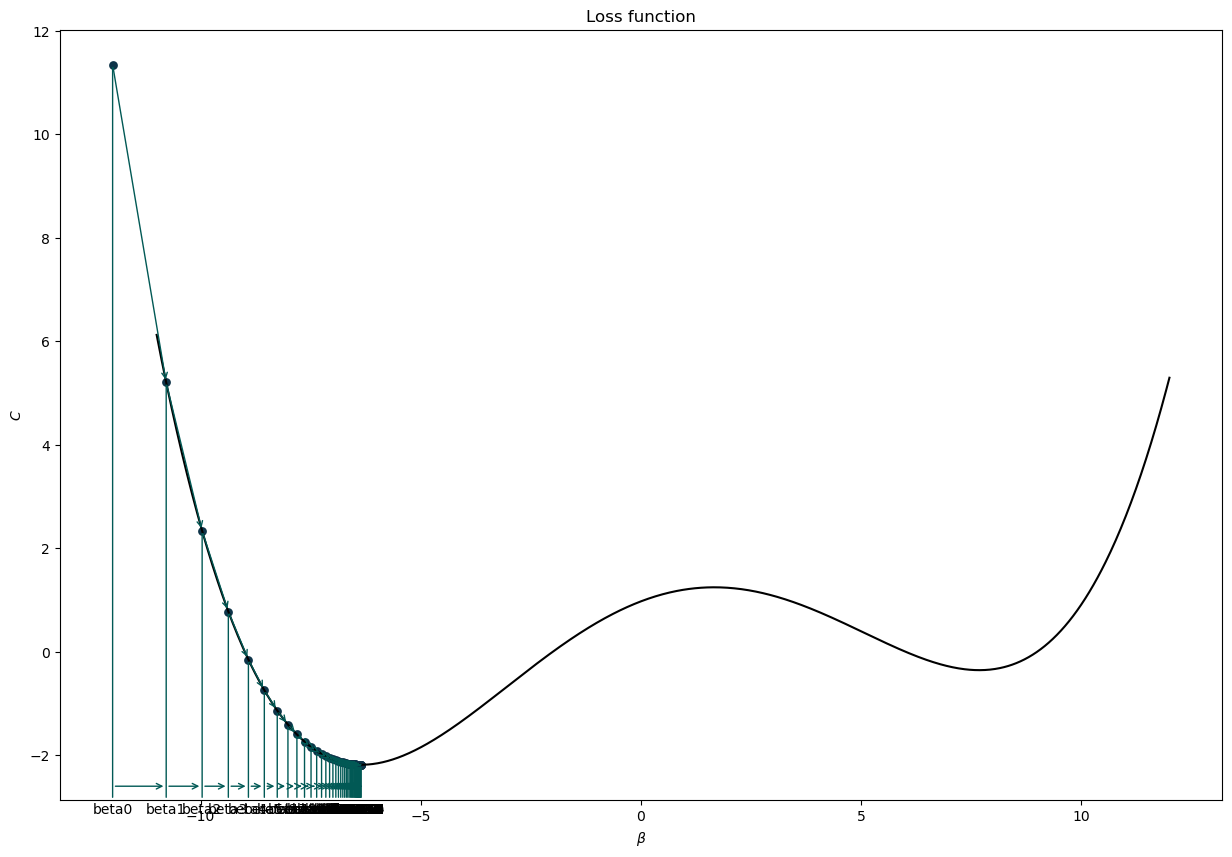

The final value of beta is : -6.36279877070696


In [12]:
# Initialization step
beta_optimum = -12

# Let's do 10 gradient descent steps
stop = 50

# We define the learning rate equals to 0.1
lr = 0.2

# Iteration
i=0
beta_list = [beta_optimum]
while i <= stop:
    beta_optimum -= lr * gradient(beta_optimum)
    beta_list.append(beta_optimum) # we make a list with all successive values of beta_optimum
    i += 1

plot_gradient_descent(beta, beta_list, func, gradient)

🎉🎉 Victory ! 🎉🎉

This starting value made it possible to reach the minimum of our loss function! In this situation it was rather easy to fix the issue, but what happens if we cannot visualize the whole shape of the loss function, which is always the case in practice? How do we know that we reach the global minimum and not a local minimum? How do we choose the starting values of the model's parameters ?

We will discover later various ways to address these issues, for now what matters is that you are now aware of one of the main downfalls of the gradient descent algorithm.

## 6 The learning rate 📚📚

As we mentionned before, the learning rate is a quantity that helps us control how fast we want the values of the parameters to change during gradient descent, it can have a fixed value or a varying value (we will learn about varying learning rates in further lessons).

Picking a reasonnable value for the learning rate is paramount! Pick a learning rate that is too small, and the gradient descent will take forever to attain a minimum, pick a learning rate too large and you may experience an explosive gradient problem! 💣

Let's see both examples :

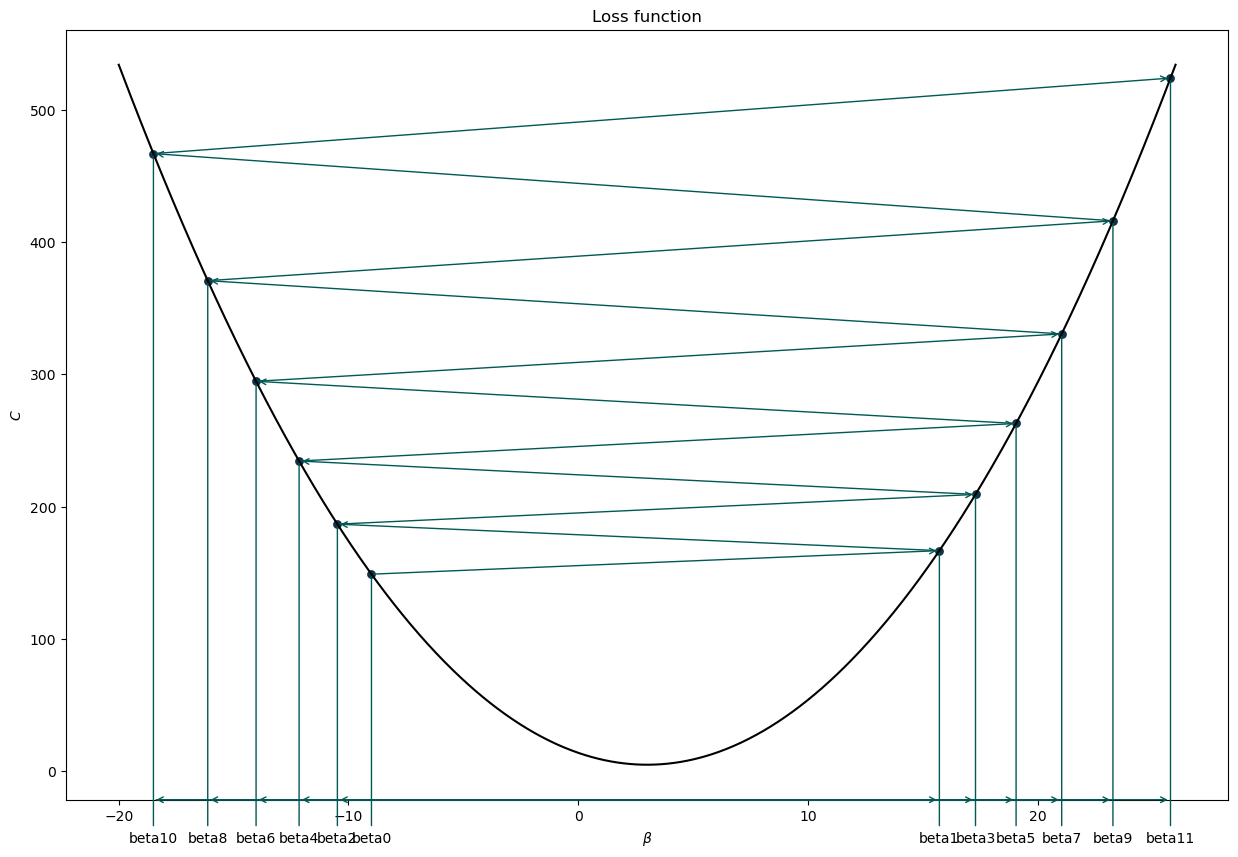

The final value of beta is : 25.779582700025106


In [45]:
# Let us generate some input data :
beta = np.linspace(-20, 26, 1000)

# Now we define a function with a single minimum
def func(beta):
    return beta**2 - 6*beta + 14

y = func(beta)

# The gradient of this function is the derivative of the function relatively to beta
def gradient(beta):
    return 2*beta - 6

# Initialization step
beta_optimum = -9.0

# Let's do 10 gradient descent steps
stop = 10

# We define the learning rate equals to 1.03
lr = 1.03

# Iteration
i=0
beta_list = [beta_optimum]
while i <= stop:
    beta_optimum -= lr * gradient(beta_optimum)
    beta_list.append(beta_optimum) # we make a list with all successive values of beta_optimum
    i += 1

plot_gradient_descent(beta, beta_list, func, gradient)

When the learning rate is too high (here we picked a value of $1.03$) the value of $beta$ moves in the right direction towards the minimum, but fast that it goes past the minimum and even results in ever increasing values of the loss function.

This is called explosive gradient problem!

Now let's see what happens if the learning is on the contrary way too small!

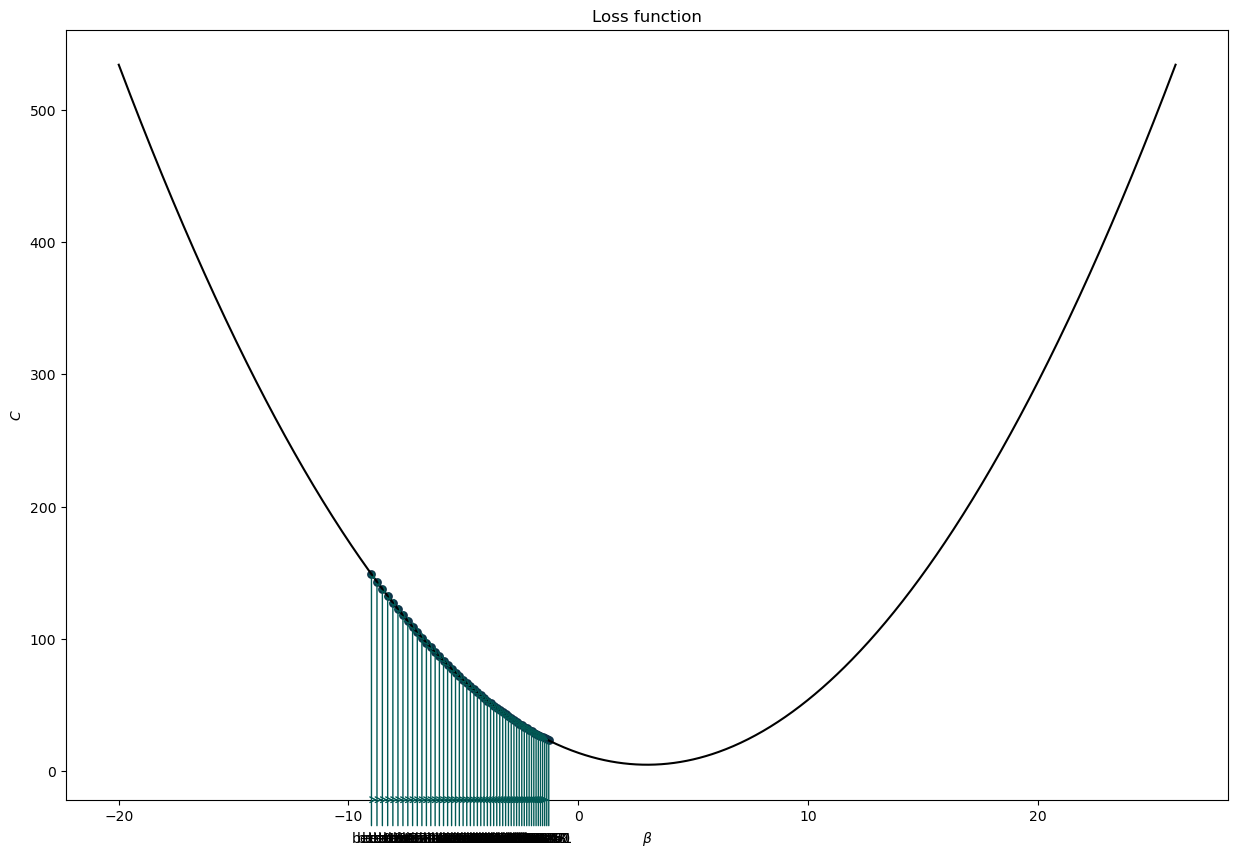

The final value of beta is : -1.2826354378244962


In [14]:
# Let us generate some input data :
beta = np.linspace(-20, 26, 1000)

# Now we define a function with a single minimum
def func(beta):
    return beta**2 - 6*beta + 14
y = func(beta)

# The gradient of this function is the derivative of the function relatively to beta
def gradient(beta):
    return 2*beta - 6

# Initialization step
beta_optimum = -9.0

# Let's do 10 gradient descent steps
stop = 50

# We define the learning rate equals to 0.01
lr = 0.01

# Iteration
i=0
beta_list = [beta_optimum]
while i <= stop:
    beta_optimum -= lr * gradient(beta_optimum)
    beta_list.append(beta_optimum) # we make a list with all successive values of beta_optimum
    i += 1

plot_gradient_descent(beta, beta_list, func, gradient)

Here we set the value of the learning rate to $0.01$ and let the gradient descent run for $50$ steps! It should have been enough to reach the minimum, however it seems that we were not able to reach it yet.

This may not appear to be a huge problem here since the code is able to run quickly, but most deep learning model have many parameters and requires the computer's processors to run gigantic numbers of calculations that take a very long time. An unnecessarily small learning rate will cause your model to train ever so slowly, if you are renting a machine from a cloud service to train your model this will loss you more money, if you run it on local machines it will immobilize them for longer, either way it's worth trying to find a learning rate that let's your model train while speeding up the training process as much as possible.

# 7. Stochastic Gradient Descent 🎲🎲
The central idea behind stochastic gradient descent is to speed up the algorithm by using useful properties of the loss function and the gradient.

Let's consider the example of one of the most classical loss function : MSE (Mean Squarred Error).
Let $Y$ be the target variable $X$ the explanatory variables and $h$ a model we are using to predict $Y$ given $X$. The loss function in this problem may be written like so :

$$
\begin{aligned}
Loss & = MSE(Y,h(X)) \\
& = \frac{1}{n}\sum_{i=1}^{n}{(y_i - h(X_i))^2}
\end{aligned}
$$

In order to optimize the loss function we need to compute the gradient:

$$
\begin{aligned}
\nabla Loss & = \nabla \frac{1}{n}\sum_{i=1}^{n}{(y_i - h(X_i))^2} & (0) \\
& = \frac{1}{n} \nabla \sum_{i=1}^{n}{(y_i - h(X_i))^2} & (1) \\
& = \frac{1}{n}\sum_{i=1}^{n}{\nabla(y_i - h(X_i))^2} & (2)
\end{aligned}
$$

We are able to go from $(0)$ to $(1)$ because the gradient operator (just like the derivation operator) is not affected by multiplication by a scalar. We go from $(1)$ to $(2)$ thanks to the fact that the gradient of a finite sum is equal to the sum of the gradients.

This means that when dealing with a prediction problem with $n$ observations, the gradient of the loss function over the $n$ observations is equal to the average gradient computed for each single observation!

This is fundamental because it suggests the idea that if we were able to extract some small sample of observations from a dataset that represents the whole population well, then the gradient computed over this sample should be very similar to the gradient computed over the whole dataset! Not only would it be similar it would also be much quicker to compute!

These ideas have led to the principle of stochastic gradient descent, the general idea is the following:

* Initialize the model's parameters
* Pick a random sample of $n'$ observations from the whole dataset containing $n$ observations
* Compute the gradient over this sample and update the parameters
* Pick a new random sample and repeat above step
* Stop when the stopping criterion is reached

There are two main differences between gradient descent and stochastic gradient descent:

* Stochastic gradient descent is faster to compute because instead of $n$ gradients, it only computes $n' < n$ gradients in order to update the parameters once
* It is, as its name suggests, stochastic (includes some randomness), the samples over which we compute the gradients are picked randomly, therefore the stochastic gradient computed at each step is an approximation of the actual gradient (it may not be the best possible direction to minimize the loss function at each step, but on average it's going in the right direction)

These two figures show a visual example of what gradient descent looks like compared to stochastic gradient descent, stochastic gradient descent does not go straight to the minimum, but each step takes way less time!

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/gradient_descent.jpg" />

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/stochastic_gradient_descent.jpg" />

In [16]:
import plotly.graph_objects as go

x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)
xx1, xx2 = np.meshgrid(x1,x2, indexing='xy')

def func_3D(x,y):
    a = 20*np.exp(- (x - 3)**2/10 - (y -2)**2/20)
    b = - 16*np.exp(- (x +1)**2/15 - (y +6)**2/20)
    c = - 5*np.exp(- (x +6)**2/25 - (y - 7)**2/13)
    return a + b + c

def grad_func_3D(x,y):
    dax = 20*np.exp(- (x - 3)**2/10 - (y -2)**2/20)*(-2*(x-3)/10) 
    dbx = - 16*np.exp(- (x +1)**2/15 - (y +6)**2/20)*(-2*(x+1)/15)
    dcx = - 5*np.exp(- (x +6)**2/25 - (y - 7)**2/13)*(-2*(x+6)/25)
    day = 20*np.exp(- (x - 3)**2/10 - (y -2)**2/20)*(-2*(y-2)/20) 
    dby = - 16*np.exp(- (x +1)**2/15 - (y +6)**2/20)*(-2*(y+6)/20) 
    dcy = - 5*np.exp(- (x +6)**2/25 - (y - 7)**2/13)*(-2*(y-7)/13)
    return dax + dbx + dcx, day + dby + dcy

y = func_3D(xx1,xx2)
y_gradient = np.gradient(y,x1,x2)

def gradient_descent(lr,x,y):
    x_grad, y_grad = grad_func_3D(x,y)
    new_x = x - lr *x_grad
    new_y = y - lr *y_grad
    grad_norm = - lr * x_grad**2 - lr * y_grad**2
    z = func_3D(x, y)
    new_z = func_3D(new_x, new_y)
    return x, y, z, new_x, new_y, new_z, x_grad, y_grad, grad_norm

list_x = []
list_y = []
list_z = []
grad_x_list = []
grad_y_list = []
grad_norm_list = []
lr = 0.1
x_start = x1[50]
y_start = x2[40]
list_x.append(x_start)
list_y.append(y_start)
list_z.append(func_3D(x_start, y_start))

for i in range(100):
    _,_,_,x_start,y_start,new_z,x_grad,y_grad,grad_norm = gradient_descent(lr,x_start,y_start)
    list_x.append(x_start)
    list_y.append(y_start)
    list_z.append(new_z) 
    grad_x_list.append(x_grad)
    grad_y_list.append(y_grad)
    grad_norm_list.append(grad_norm)

fig = go.Figure(data=[go.Surface(
    contours = {
        "z": {"show": True, "start": -16, "end": 20, "size": 2, "color":"black"}
    },
    x = x1,
    y = x2,
    z = y,
    colorscale=[color_chart[3], color_chart[-2]], 
    opacity = 0.7),
    go.Cone(
        x=list_x[1:],
        y=list_y[1:],
        z=list_z[1:],
        u=grad_x_list,
        v=grad_y_list,
        w=grad_norm_list,
        sizemode="absolute",
        sizeref=2,
        anchor='tail',
        colorscale=["black","black"],
        showscale=False),

        go.Scatter3d(
        x=list_x,
        y=list_y,
        z=list_z,
        mode='lines',
        line=dict(
            color='black',
            width=2
        ))])

fig.update_layout(
        scene = {
            "xaxis": {"nticks": 20},
            "yaxis": {"nticks": 20},
            "zaxis": {"nticks": 4},
            'camera_eye': {"x": 0, "y": -1, "z": 1},
            "aspectratio": {"x": 1, "y": 1, "z": 1},
            "annotations":[dict(x=xx1[50,60] + y_gradient[0][50,60],
                                y=xx2[50,60] + y_gradient[1][50,60],
                                z=y[50,60] + y_gradient[0][50,60]**2 + y_gradient[1][50,60]**2 + xx2[50,60] + 1,
                               text="Gradient",
                               textangle=0,
                               ax=-20,
                               ay=-20,
                               font=dict(
                                   color="black",
                                   size=18
                                   ),
                               arrowcolor="black",
                               arrowsize=1,
                               arrowwidth=1,
                               arrowhead=1)]
        })
# fig.show("svg")
fig.show()

## 8. Batch Gradient Descent
Stochastic gradient descent is a brilliant idea that makes training models much faster, however it has one small downside, the data on which it trains at each step is sampled randomly from the data, therefore there is no telling when we would have seen each observation from the original dataset at least once, also two separate processes of stochastic gradient descent cannot really be compared before convergence because of how random it is.

A solution to both problems is to add a little more constraint on the stochastic gradient descent method. We will keep some randomness but impose some rules as well. 

This variant is called batch gradient descent and does the following :
* The training data is shuffled
* The training data is split into batches of a given size
* Each batch is used once to take one gradient descent step
This process ensures that each observation in the training data is used exactly once to compute the gradient and update the parameters of the model. Going through each of these three steps is called an **epoch**, a word that we will keep seeing throughout this deep learning module. An **epoch** is a unit that is used to measure how much we have let a model train, it is useful because it makes models performances comparable, *model A* and *model B* may be compared in terms of their accuracy after *E* **epochs** of training (meaning after they have been able to use each observation in the training set *E* times to train).

In practice we will only use batch gradient descent in order to train deep learning models.

## Let's sum it up 🔚🔚

We have learned that in order to train models, we need to define a loss function that measures how bad the predictions are. The batch gradient descent algorithm is a method that makes it possible to minimize this loss function in a smart, efficient way and fast manner.

You have now all the theoretical background that we need in order to start working on the exercises!

## Ressources 📚📚
* <a href="https://machinelearningmastery.com/gradient-descent-for-machine-learning/#:~:text=Gradient%20descent%20is%20a%20simple,data%20before%20calculating%20an%20update." target="_blank">Alternative lecture on gradient descent and very good ressource for all things machine learning</a>
* <a href="https://scipython.com/blog/visualizing-the-gradient-descent-method/">Source for visualizing gradient descent in matplotlib</a>
* <a href="https://www.youtube.com/watch?v=sDv4f4s2SB8">A very simple video, and overall good youtube channel on all things data </a>
* <a href="https://www.youtube.com/watch?v=IHZwWFHWa-w">A video introducing the role of gradient descent in deep learning this is a good youtube channel for learning deep learning</a>